In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

## A. Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

#### Okay, now let’s put this to work in a function:

In [4]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.

Add this to the bottom of the function above.

In [7]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\safreena\AppData\Local\Temp\ipykernel_12936\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023
...,...,...,...,...
4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022
4996,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022
4997,5.0,Excellent camera,The media could not be loaded.,26 October 2022
4998,5.0,Zindagi me itna kharab quality ka phone kabhi ...,Very very very bad camera both front and back,14 September 2022


In [9]:
df.to_csv(r"C:\Users\safreena\Desktop\Assignments ExcelR\Text mining\Data sets\Amazon_Reviews_Oneplus_Nord_CE2.csv")

  ## 2. Import Libraries

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Pa

In [122]:
# load the dataset
reviews=pd.read_csv(r"C:\Users\safreena\Desktop\Assignments ExcelR\Text mining\Data sets\Amazon_Reviews_Oneplus_Nord_CE2.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head(20)

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023
5,4.0,Good phone if you buy under 18K,"Performance up to the mark👍, If you do more ga...",26 February 2023
6,4.0,Posting after 1 month of use,"Well, mobile perform wellCamera- 8/10Processor...",7 March 2023
7,4.0,Good,The media could not be loaded.\n ...,5 March 2023
8,4.0,Never Settle,Absolutely the best smartphone with value for ...,19 February 2023
9,4.0,Battery low capacity,Battery get charge down very much. Rest of thi...,5 March 2023


In [124]:


# remove "Reviewed in India" from Review_Date column
mask = reviews['Review_Date'].str.contains('Reviewed in India 🇮🇳 on')
reviews.loc[mask, 'Review_Date'] = reviews.loc[mask, 'Review_Date'].str.split('Reviewed in India 🇮🇳 on ').str[1]

# print updated DataFrame
print(reviews[['Review_Date']].head(20))


         Review_Date
0   19 December 2022
1     5 January 2023
2    12 January 2023
3       3 March 2023
4    5 February 2023
5   26 February 2023
6       7 March 2023
7       5 March 2023
8   19 February 2023
9       5 March 2023
10      4 March 2023
11      6 March 2023
12      6 March 2023
13      9 March 2023
14      8 March 2023
15  19 February 2023
16      1 March 2023
17      2 March 2023
18      6 March 2023
19  25 February 2023


## 3. Data Exploration

In [125]:
reviews.Rating.describe()

count    5000.000000
mean        4.197400
std         0.814718
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

## Number of Words

In [126]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,This is definitely a budget branded phone 📱 af...,152
2,I will try to keep this review short. This rev...,216
3,Operating system and multitasking is good for ...,77
4,I bought the phone in Jan 2023 @ 18250. Below ...,192


## Number of characters

In [127]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715.0
1,This is definitely a budget branded phone 📱 af...,807.0
2,I will try to keep this review short. This rev...,1189.0
3,Operating system and multitasking is good for ...,395.0
4,I bought the phone in Jan 2023 @ 18250. Below ...,1127.0


## Average Word Length

In [128]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,This is definitely a budget branded phone 📱 af...,4.344371
2,I will try to keep this review short. This rev...,4.509259
3,Operating system and multitasking is good for ...,4.142857
4,I bought the phone in Jan 2023 @ 18250. Below ...,4.875000


## Number of stopwords

In [129]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,This is definitely a budget branded phone 📱 af...,53
2,I will try to keep this review short. This rev...,94
3,Operating system and multitasking is good for ...,30
4,I bought the phone in Jan 2023 @ 18250. Below ...,56


## Number of special characters

In [130]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,This is definitely a budget branded phone 📱 af...,0
2,I will try to keep this review short. This rev...,0
3,Operating system and multitasking is good for ...,0
4,I bought the phone in Jan 2023 @ 18250. Below ...,0


### Number of numerics

In [131]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,This is definitely a budget branded phone 📱 af...,7
2,I will try to keep this review short. This rev...,0
3,Operating system and multitasking is good for ...,3
4,I bought the phone in Jan 2023 @ 18250. Below ...,3


 ## Number of Uppercase words

In [132]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,This is definitely a budget branded phone 📱 af...,3
2,I will try to keep this review short. This rev...,3
3,Operating system and multitasking is good for ...,3
4,I bought the phone in Jan 2023 @ 18250. Below ...,9


In [133]:
reviews

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,299,1715.0,4.755034,128,0,2,4
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023,152,807.0,4.344371,53,0,7,3
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,216,1189.0,4.509259,94,0,0,3
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023,77,395.0,4.142857,30,0,3,3
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023,192,1127.0,4.875000,56,0,3,9
...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022,16,85.0,4.375000,6,0,0,0
4996,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022,13,93.0,6.230769,2,0,0,1
4997,5.0,Excellent camera,The media could not be loaded.,26 October 2022,6,30.0,4.166667,2,0,0,0
4998,5.0,Zindagi me itna kharab quality ka phone kabhi ...,Very very very bad camera both front and back,14 September 2022,9,45.0,4.111111,4,0,0,0


In [134]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [135]:
reviews

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023
...,...,...,...,...
4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022
4996,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022
4997,5.0,Excellent camera,The media could not be loaded.,26 October 2022
4998,5.0,Zindagi me itna kharab quality ka phone kabhi ...,Very very very bad camera both front and back,14 September 2022


## Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [136]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    His is definitely a budget branded phone 📱 aft...
2    I will try to keep this review short. His revi...
3    Operating system and multitasking is good for ...
4    I bought the phone in An 2023 @ 18250. Below a...
Name: Review, dtype: object

###### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

## 4. Feature Engineering

In [137]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       19
1        5
2       12
3        3
4        5
        ..
4995    16
4996     3
4997    26
4998    14
4999     4
Name: Review_Date, Length: 5000, dtype: object 
 0        December
1         January
2         January
3           March
4        February
          ...    
4995        March
4996        April
4997      October
4998    September
4999        April
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [138]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,19,December,2022
1,5,January,2023
2,12,January,2023
3,3,March,2023
4,5,February,2023
...,...,...,...
4995,16,March,2022
4996,3,April,2022
4997,26,October,2022
4998,14,September,2022


In [139]:
df.Month.value_counts()

October      867
November     685
September    515
August       464
December     418
July         383
January      376
February     367
June         336
May          271
March        207
April        111
Name: Month, dtype: int64

In [140]:
### Change 'month' from words to numbers for easier analysis

In [141]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,12
1,1
2,1
3,3
4,2
...,...
4995,3
4996,4
4997,10
4998,9


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4999 non-null   object 
 2   Review       4766 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   int64  
 6   Year         5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [143]:
df1
df1.head(20)

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,19,12,2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023,5,1,2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,12,1,2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023,3,3,2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023,5,2,2023
5,4.0,Good phone if you buy under 18K,"Performance up to the mark👍, If you do more ga...",26 February 2023,26,2,2023
6,4.0,Posting after 1 month of use,"Well, mobile perform wellCamera- 8/10Processor...",7 March 2023,7,3,2023
7,4.0,Good,The media could not be loaded.\n ...,5 March 2023,5,3,2023
8,4.0,Never Settle,Absolutely the best smartphone with value for ...,19 February 2023,19,2,2023
9,4.0,Battery low capacity,Battery get charge down very much. Rest of thi...,5 March 2023,5,3,2023


In [144]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4999 non-null   object 
 2   Review       4766 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   int64  
 5   Month        5000 non-null   int64  
 6   Year         5000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 273.6+ KB


## Dropping the Original Columns after splitting the data

In [145]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19,12,2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5,1,2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12,1,2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3,3,2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5,2,2023


In [146]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,19,December,2022
1,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023,5,January,2023
2,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,12,January,2023
3,4.0,Okay for the budget phone.,Operating system and multitasking is good for ...,3 March 2023,3,March,2023
4,4.0,Budget friendly reliable phone,I bought the phone in Jan 2023 @ 18250. Below ...,5 February 2023,5,February,2023
...,...,...,...,...,...,...,...
4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022,16,March,2022
4996,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022,3,April,2022
4997,5.0,Excellent camera,The media could not be loaded.,26 October 2022,26,October,2022
4998,5.0,Zindagi me itna kharab quality ka phone kabhi ...,Very very very bad camera both front and back,14 September 2022,14,September,2022


## 5. Data Visualization
date versus review count

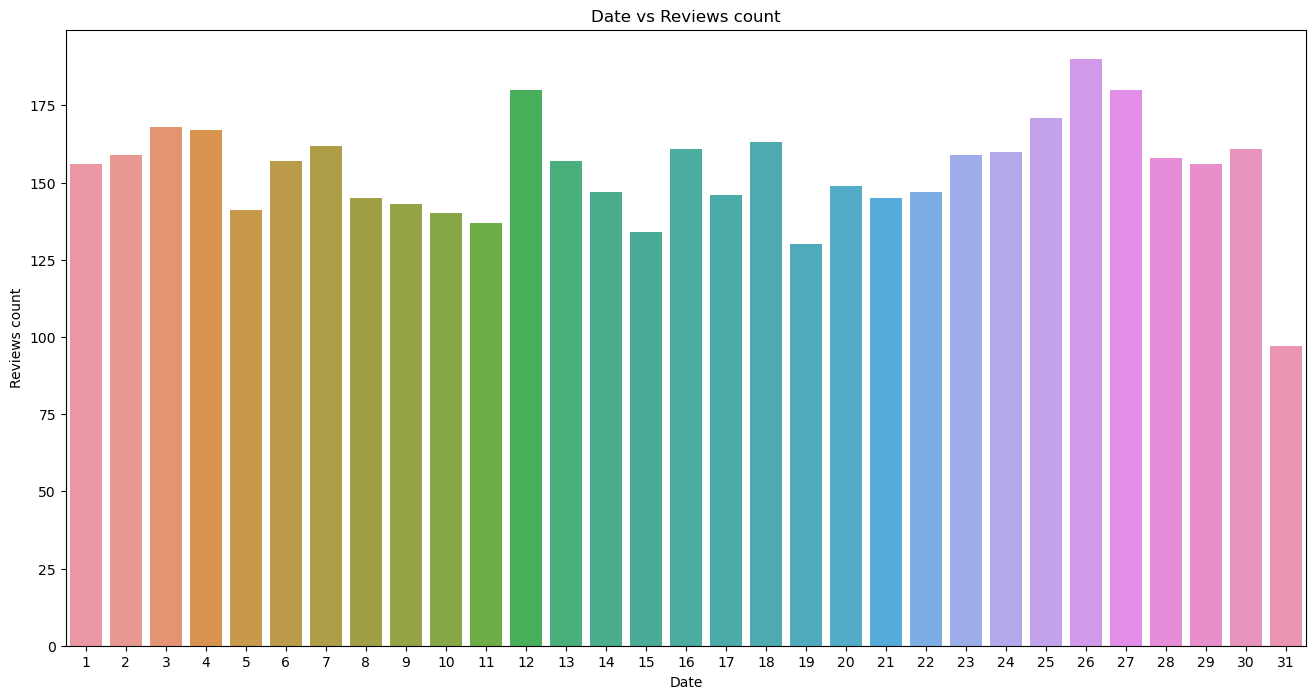

In [147]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

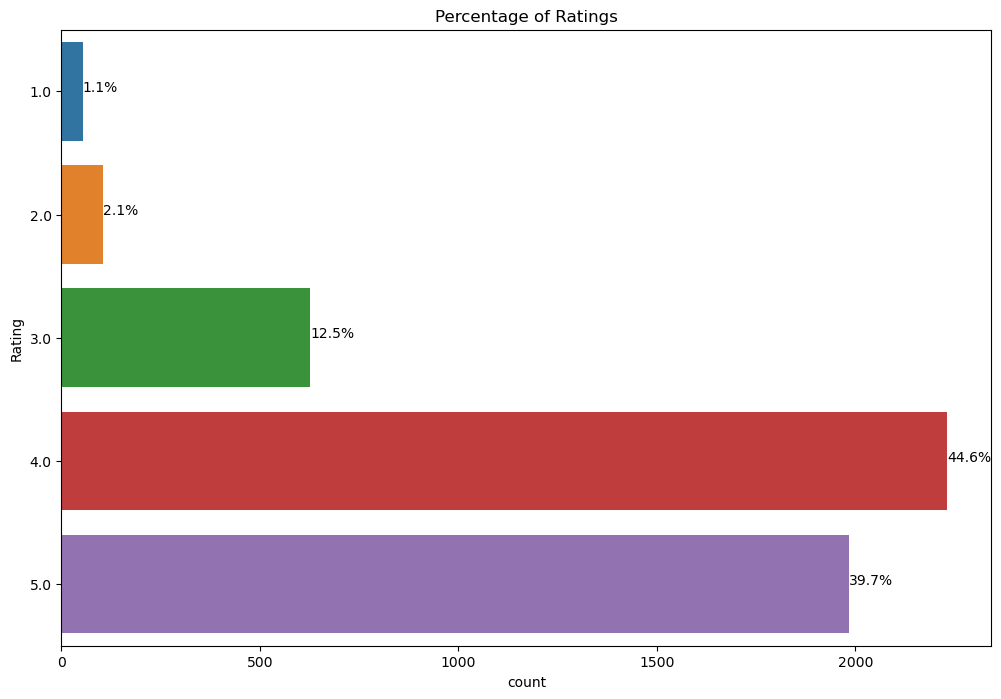

In [148]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

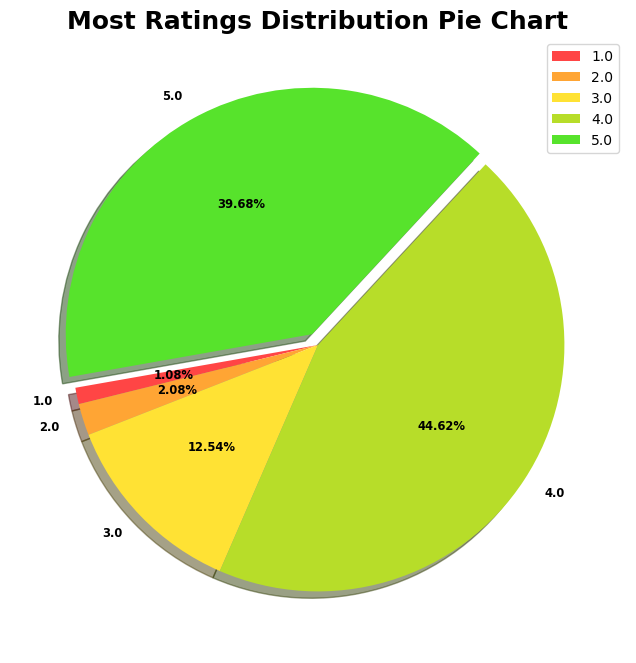

In [149]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

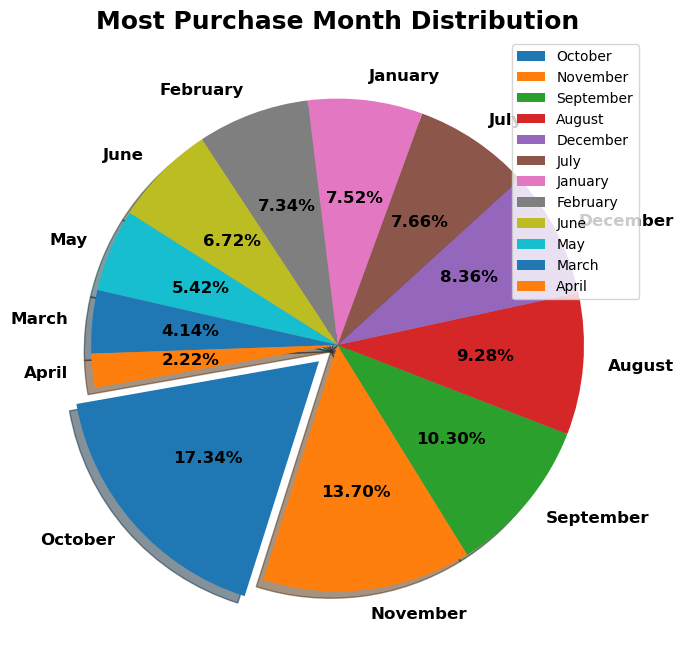

In [152]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

## 6. BasicText Preprocessing
### A. For Sentiment Analysis
keeping the DataFrame intact and each tweets separate from each other

In [153]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,This is definitely a budget branded phone 📱 af...
2,I will try to keep this review short. This rev...
3,Operating system and multitasking is good for ...
4,I bought the phone in Jan 2023 @ 18250. Below ...
...,...
4995,"Light weight, smooth, Camera is Ok for normal ..."
4996,Ya .I like it..all specifications are good.its...
4997,The media could not be loaded.
4998,Very very very bad camera both front and back


In [154]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [155]:
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,this definitely budget branded phone 📱 1 month...
2,i try keep review short. this review perspecti...
3,operating system multitasking good budget phon...
4,i bought phone jan 2023 @ 18250. below pros co...
...,...
4995,"light weight, smooth, camera ok normal person,..."
4996,ya .i like it..all specifications good.its sma...
4997,the media could loaded.
4998,very bad camera front back


In [156]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [157]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...


## 7. Text Pre-processing Techniques
### A. Pre-processing 'Key Words'
#### a. Removing '@names'

In [158]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [160]:
import numpy as np 
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### b. Removing links (http | https)

In [161]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### c. Removing Review with empty text

In [162]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### d. Dropping duplicate rows

In [163]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### e. Resetting index
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [164]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


## f. Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [165]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [166]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### g. Function to remove emoji

In [167]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [168]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


In [169]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,"[definitely, budget, branded, phone, month, da..."
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...,"[operating, system, multitasking, good, budget..."
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...,"[bought, phone, jan, pro, con, observed, pro, ..."
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga...","[performance, mark, gaming, average, phone, de..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor...","[well, mobile, perform, wellcamera, processor,..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...,"[medium, could, loaded, advantage, camera, goo..."
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...,"[absolutely, best, smartphone, value, money, f..."
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...,"[battery, get, charge, much, rest, thing, okay]"


In [170]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

### h. Removing Stop words
With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for key_phrases sentiment analysis.

In [172]:
import codecs
with codecs.open("C:/Users/Safreena/Downloads/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [173]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [174]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...
5,performance mark gaming average phone definite...,"Performance up to the mark👍, If you do more ga..."
6,well mobile perform wellcamera processor non g...,"Well, mobile perform wellCamera- 8/10Processor..."
7,medium could loaded advantage camera good mp b...,The media could not be loaded.\n ...
8,absolutely best smartphone value money fan one...,Absolutely the best smartphone with value for ...
9,battery get charge much rest thing okay,Battery get charge down very much. Rest of thi...


### i. Tokenize 'Clean_Reviews'

In [175]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['definitely', 'budget', 'branded', 'phone', 'month', 'day', 'use', 'today', 'posting', 'review', 'got', 'phone', 'childrens', 'day', 'gift', 'father', 'pro', 'heavy', 'user', 'charge', 'stay', 'hour', 'otherwise', 'stay', 'almost', 'day', 'smooth', 'touch', 'issue', 'typing', 'anything', 'camera', 'quality', 'awesome', 'show', 'original', 'skin', 'texture', 'audio', 'quality', 'also', 'awesome', 'video', 'quality', 'wow', 'g', 'enable', 'clean', 'uicons', 'filter', 'lover', 'like', 'original', 'skin', 'texture', 'phone', 'phone', 'p', 'resolution', 'limited', 'g', 'band', 'hdr', 'support', 'netflix', 'amazon', 'prime', 'mean', 'viewing', 'experience', 'always', 'lag', 'behind'])

In [176]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [definitely, budget, branded, phone, month, da...
2    [try, keep, review, short, review, perspective...
3    [operating, system, multitasking, good, budget...
4    [bought, phone, jan, pro, con, observed, pro, ...
5    [performance, mark, gaming, average, phone, de...
6    [well, mobile, perform, wellcamera, processor,...
7    [medium, could, loaded, advantage, camera, goo...
8    [absolutely, best, smartphone, value, money, f...
9      [battery, get, charge, much, rest, thing, okay]
Name: Clean_Reviews, dtype: object

### j. Converting words to Stemmer

In [177]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [178]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,purchas gb version phone come extend gb ram vi...
1,definit budget brand phone month day use today...
2,tri keep review short review perspect averag u...
3,oper system multitask good budget phone could ...
4,bought phone jan pro con observ pro lightweigh...
...,...
4943,light weight smooth camera ok normal person ni...
4944,ya like specif good small negat front camera o...
4945,medium could load
4946,bad camera front back


### k. Converting words to Lemma

In [179]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\safreena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,purchased gb version phone come extendable gb ...
1,definitely budget branded phone month day use ...
2,try keep review short review perspective avera...
3,operating system multitasking good budget phon...
4,bought phone jan pro con observed pro lightwei...
...,...
4943,light weight smooth camera ok normal person ni...
4944,ya like specification good small negative fron...
4945,medium could loaded
4946,bad camera front back


## 8. Basic Feature Extaction
### A. Applying bag of Words without N grams

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [181]:
#print(cv.vocabulary_)

In [182]:
print(cv.get_feature_names()[109:200])

['agin', 'agni', 'ago', 'agree', 'ah', 'ahead', 'aheadof', 'ai', 'aince', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'ama', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingcamera', 'amazingly', 'amazingthis', 'amazon', 'amazone', 'amazonit', 'ambient', 'amd', 'amezing', 'amezingcharging', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amolad', 'amoled', 'amolid', 'among', 'amount', 'amountand', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andif', 'andorid', 'android', 'androidbattery', 'androidfast', 'andthe', 'angel', 'angle', 'angry', 'animation', 'announce', 'announcement', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore']


C:\Users\safreena\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [183]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aanouncementcamera', 'aap', 'aapko', 'aaplog', 'aati', 'aayega', 'ab', 'abb', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'acknowledge', 'across', 'act', 'activate', 'activated', 'activates', 'activity', 'actuaaly', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'additionally', 'addon', 'address', 'adequate', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage

In [184]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [185]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [186]:
corpus[3]

'oper system multitask good budget phone could better option choos time format hour instead hour sinc u habitu hour time nd day usag seem batteri drain bit faster thought mayb use samsung feel way els decent budget phone'

In [187]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [188]:
X.shape

(4948, 5000)

In [189]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'abl use',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [190]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [191]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aacha,aap,ab,abl,abl use,absolut,accept,access,accessori,accha,...,year secur,year secur updat,yellow,yesterday,yet,youtub,youtub video,yr,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## C. TF-IDF Vectorizer

In [192]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [193]:
corpus[4]

'bought phone jan pro con observ pro lightweight good processor snapdragon day day task heat issu display bright enough sunlight usag network connect good abl use jio g phone best speed far mbp call qualiti good ram manag decent ram plu e find lag even heavier task speaker loud clear good fingerprint scanner good faster oxygen clean snappier without bloatwar main camera front camera decent price rang low light perform decent need steadi hand shake free imag camera come good featur batteri backup realli good last day easili normal medium usag attach batteri usag detail con display ip lcd could amol miss oi main camera ei realli help cannot record k video plastic bodi ok durabl gorilla glass protect better instal screen protect'

In [194]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [195]:
X.shape

(4948, 5000)

In [196]:
tfidf_v.get_feature_names()[:20]

C:\Users\safreena\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'ab',
 'abl',
 'abl use',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [197]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [198]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aacha,aap,ab,abl,abl use,absolut,accept,access,accessori,accha,...,year secur,year secur updat,yellow,yesterday,yet,youtub,youtub video,yr,zero,zoom
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076862,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.077421,0.097287,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4944,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4945,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4946,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### D. Named Entity Recognition (NER)

In [199]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [200]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [201]:
for token in doc_block[:50]:
    print(token,token.pos_) 

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [202]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['branded', 'phone', 'month', 'day', 'use', 'today', 'posting', 'review', 'got', 'phone', 'childrens', 'day', 'gift', 'father', 'user', 'charge', 'stay', 'hour', 'stay', 'day', 'touch', 'issue', 'typing', 'camera', 'quality', 'show', 'skin', 'texture', 'quality', 'video', 'quality', 'uicons', 'skin', 'texture', 'phone', 'phone', 'p', 'resolution', 'limited', 'band', 'support', 'mean', 'viewing', 'experience', 'lag', 'try', 'keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time']


In [203]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,2184
1,camera,1526
2,battery,1003
3,quality,906
4,product,499
5,price,489
6,day,340
7,life,339
8,performance,322
9,charging,300


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

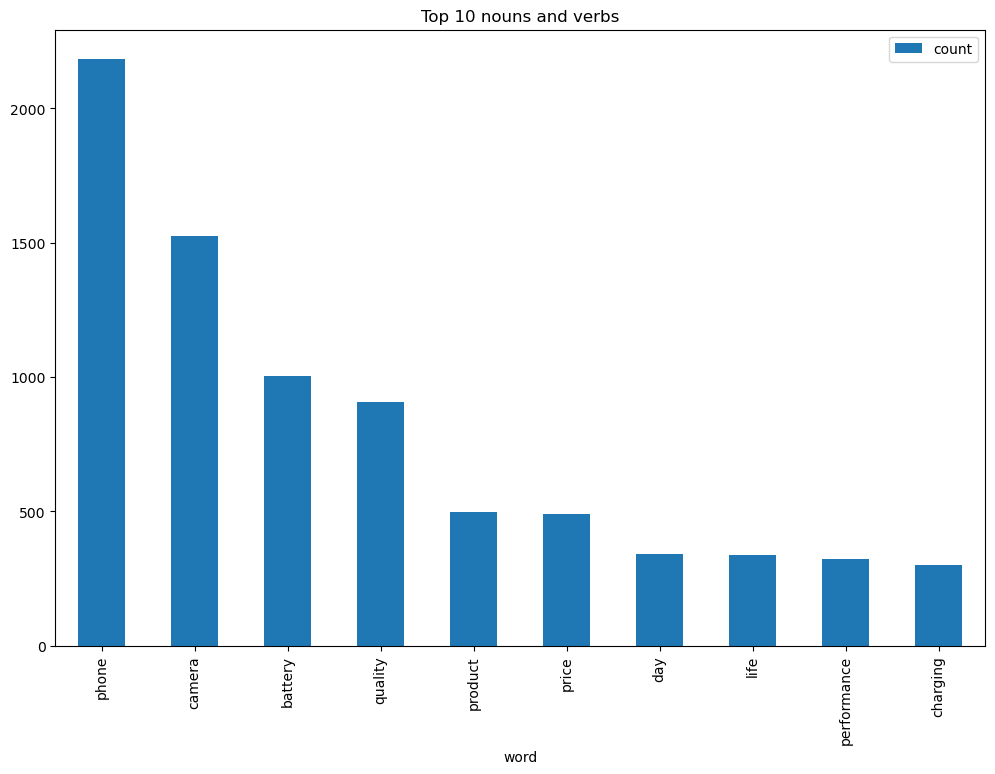

In [204]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## 9. Feature Extraction
We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

#### Bag of words (Simple vectorization)
#### TF-IDF (Term Frequency - Inverse Document Frequency)
We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

### A. Feature Extraction for 'Key Words'

In [205]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## 10. Fetch sentiments
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:
### a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)
### b. Using TextBlob

In [233]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### a. Using NLTK's SentimentIntensityAnalyzer  

In [234]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,4558
neg,390


In [235]:
dataframe.Clean_Reviews[8]

'absolutely best smartphone value money fan oneplus always wanted buy phone finally got one delighted mobile battery backup excellent standby screen time use hour test playing game sure give good experience camera quality good smoother writing review using month'

In [236]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.976}

In [237]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."
1,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co..."
2,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co..."
3,operating system multitasking good budget phon...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp..."
4,bought phone jan pro con observed pro lightwei...,"{'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com..."


In [238]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876
1,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...",0.9839
2,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776
3,operating system multitasking good budget phon...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.7003
4,bought phone jan pro con observed pro lightwei...,"{'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...",0.9908


In [240]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
1,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...",0.9839,Positive
2,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776,Positive
3,operating system multitasking good budget phon...,"{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'comp...",0.7003,Positive
4,bought phone jan pro con observed pro lightwei...,"{'neg': 0.053, 'neu': 0.63, 'pos': 0.317, 'com...",0.9908,Positive
...,...,...,...,...
4943,light weight smooth camera ok normal person ni...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.2960,Positive
4944,ya like specification good small negative fron...,"{'neg': 0.206, 'neu': 0.333, 'pos': 0.461, 'co...",0.5574,Positive
4945,medium could loaded,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4946,bad camera front back,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.5423,Negative


In [241]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\safreena\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [242]:
df["sentiment"]

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
4943    Positive
4944    Positive
4945     Neutral
4946    Negative
4947    Negative
Name: sentiment, Length: 4948, dtype: object

In [243]:
sentiment_counts = df['sentiment'].value_counts(ascending=False)
print(sentiment_counts)

Positive    3713
Neutral      847
Negative     388
Name: sentiment, dtype: int64


<AxesSubplot:xlabel='sentiment', ylabel='count'>

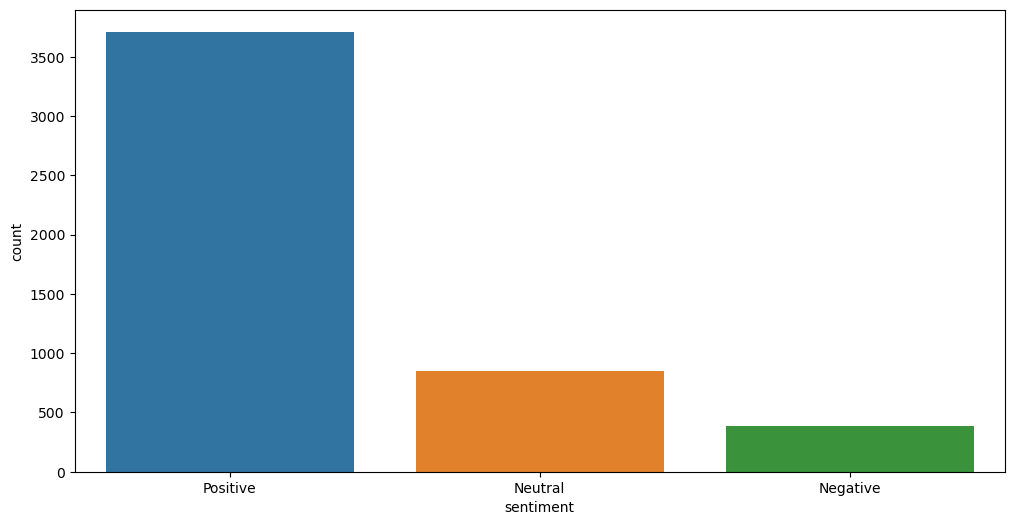

In [244]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\safreena\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

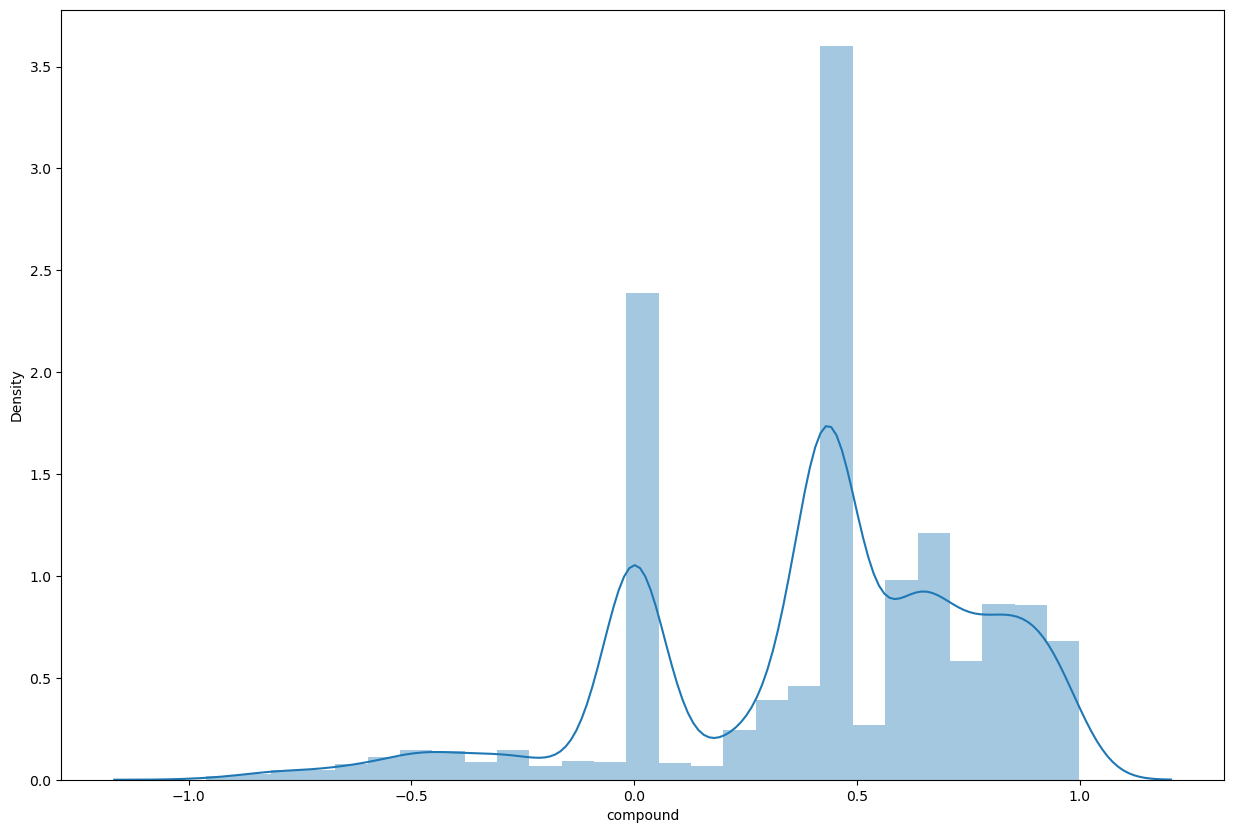

In [245]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [251]:
fd_sorted

,word,wordcount
0,phone,253
1,camera,164
2,quality,114
3,battery,112
4,bad,88
...,...,...
1448,switched,1
1449,comesi,1
1450,ad,1
1451,twist,1


In [257]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,4619
neg,329


In [258]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,0.685863,0.219395
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...,0.588889,0.455556
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...,0.541389,0.357222


Text(0, 0.5, 'Subjectivity')

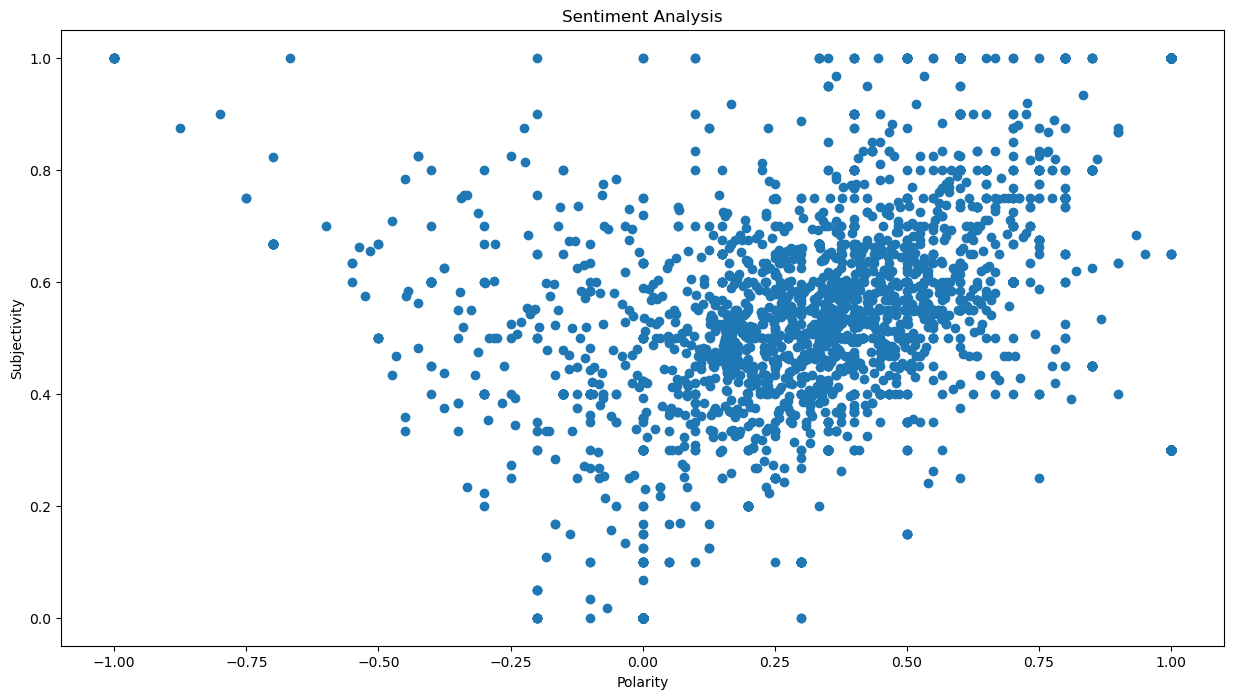

In [259]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [260]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [261]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("C:/Users/safreena/Downloads/clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos
1,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,0.685863,0.219395,pos
2,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769,pos
3,operating system multitasking good budget phon...,Operating system and multitasking is good for ...,0.588889,0.455556,pos
4,bought phone jan pro con observed pro lightwei...,I bought the phone in Jan 2023 @ 18250. Below ...,0.541389,0.357222,pos


## 11. Story Generation and Visualization

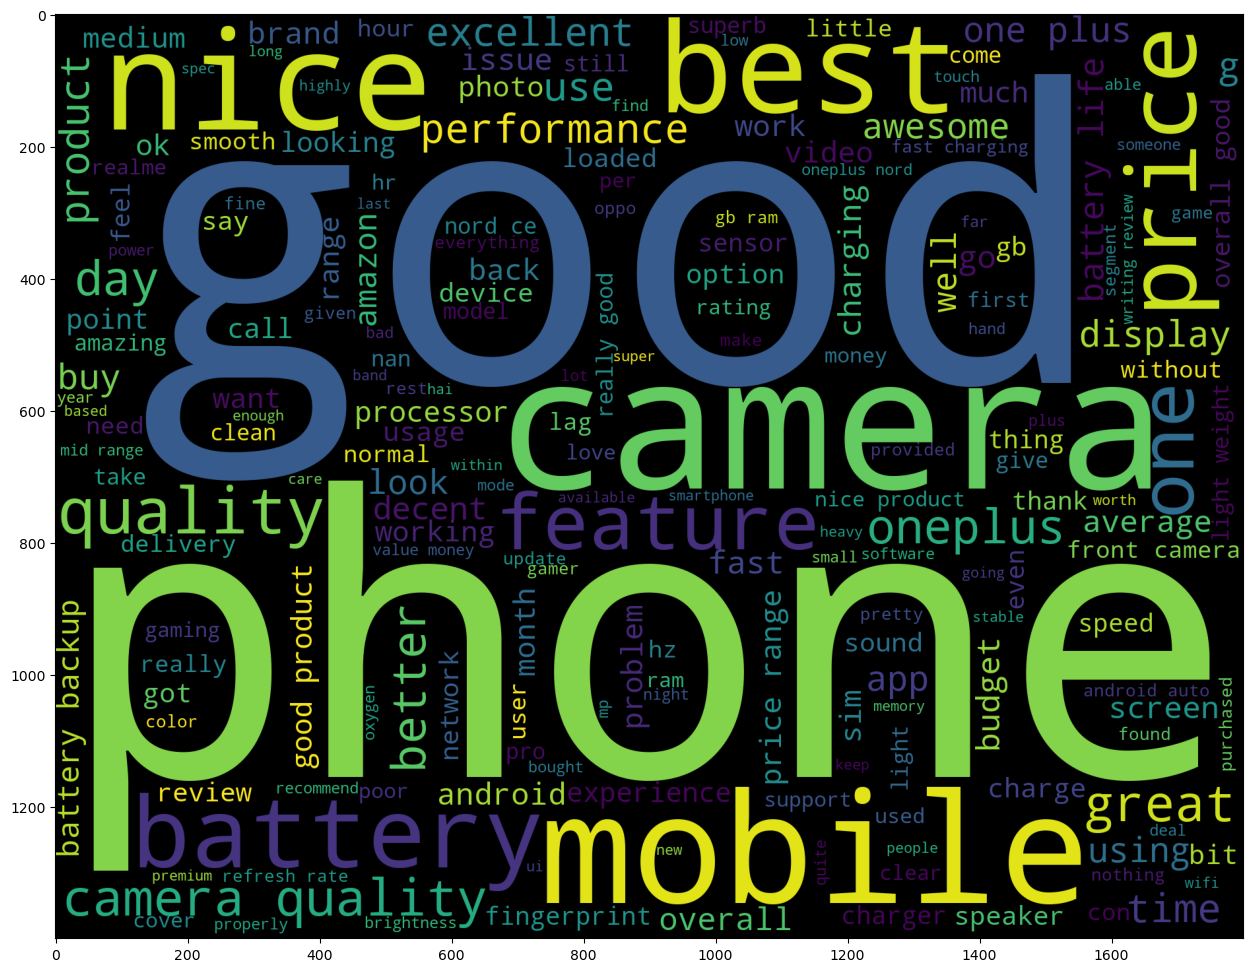

In [262]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

### A. Most common words in positive Review
Answer can be best found using WordCloud

In [263]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

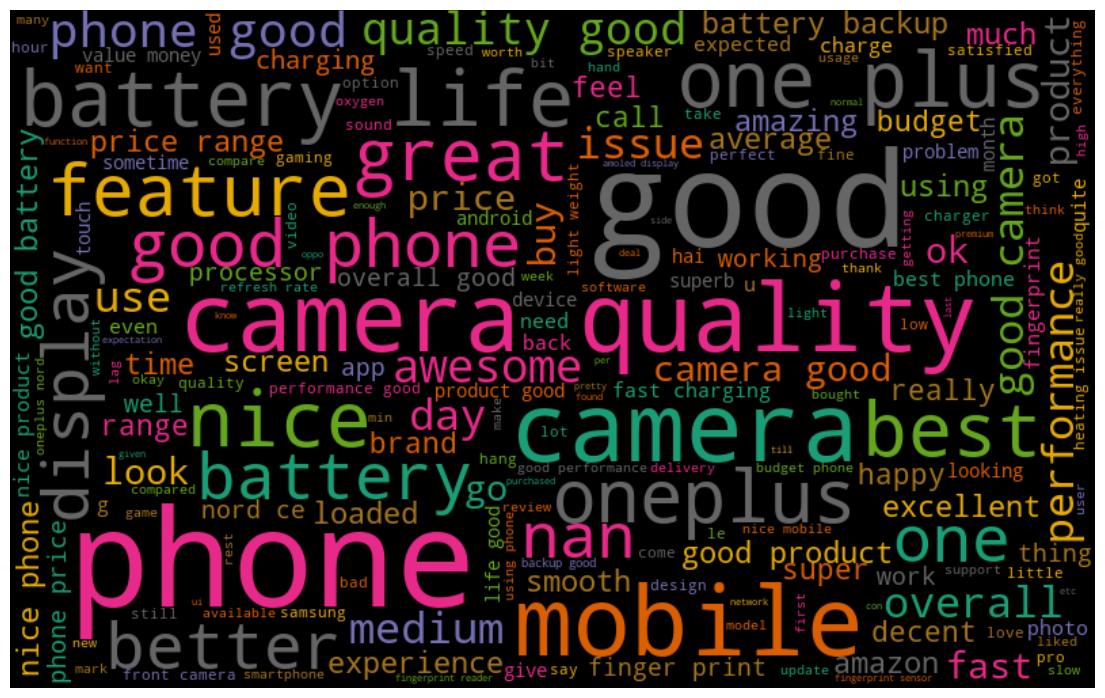

In [264]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

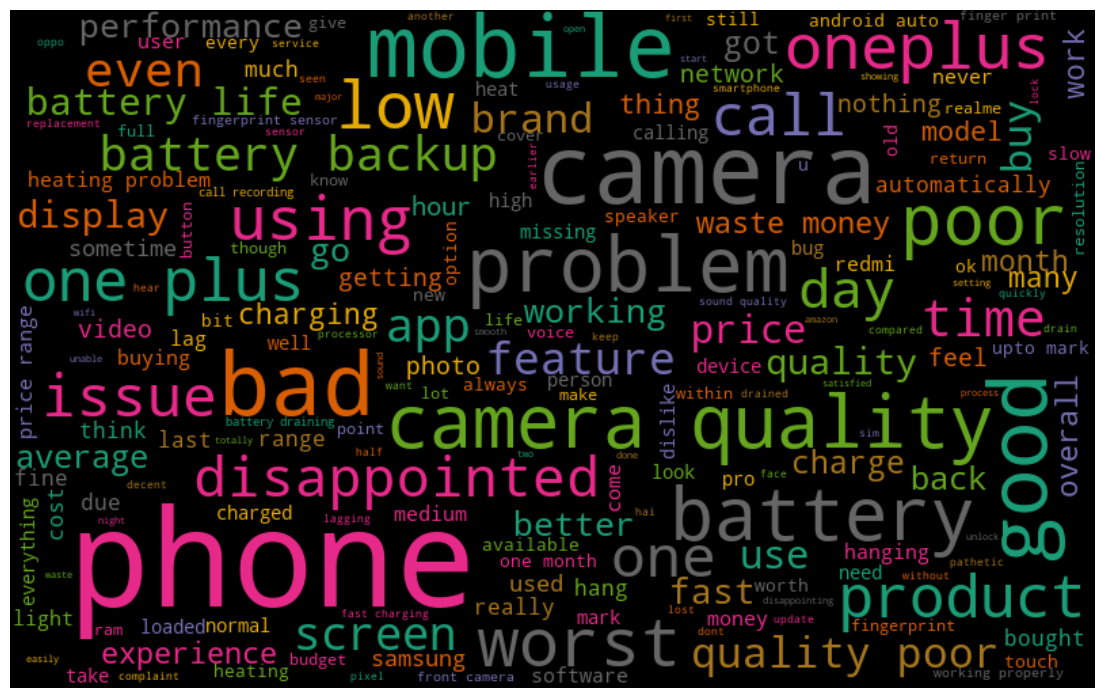

In [265]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)